<a href="https://colab.research.google.com/github/vishzzl/Deeplearning_tensor_flow/blob/master/Penumonia_Classification_using_Xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen= ImageDataGenerator(rescale=1./255)
train_dr=r"/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train"
train_generator=train_datagen.flow_from_directory(
    train_dr,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary')

FileNotFoundError: ignored

In [0]:
test_datagen= ImageDataGenerator(rescale=1./255)
test_dr=r"/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test"
test_genrator=test_datagen.flow_from_directory(
    test_dr,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary')

Found 624 images belonging to 2 classes.


In [0]:
val_datagen= ImageDataGenerator(rescale=1./255)
val_dr=r"/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val"
val_genrator=val_datagen.flow_from_directory(
    val_dr,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [0]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [0]:
from tensorflow.keras.optimizers import RMSprop

In [0]:
model.compile(loss="binary_crossentropy",
             optimizer=RMSprop(lr=0.001),
             metrics=['acc'])

In [0]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1)

Train for 8 steps
Epoch 1/15
8/8 [==============================] - 31s 4s/step - loss: 4.4599 - acc: 0.6338
Epoch 2/15
8/8 [==============================] - 33s 4s/step - loss: 0.7434 - acc: 0.7298
Epoch 3/15
8/8 [==============================] - 32s 4s/step - loss: 0.4276 - acc: 0.8242
Epoch 4/15
8/8 [==============================] - 31s 4s/step - loss: 0.3328 - acc: 0.8525
Epoch 5/15
8/8 [==============================] - 34s 4s/step - loss: 0.8012 - acc: 0.8301
Epoch 6/15
8/8 [==============================] - 31s 4s/step - loss: 0.3339 - acc: 0.8643
Epoch 7/15
8/8 [==============================] - 30s 4s/step - loss: 0.2726 - acc: 0.8942
Epoch 8/15
8/8 [==============================] - 30s 4s/step - loss: 0.1561 - acc: 0.9395
Epoch 9/15
8/8 [==============================] - 32s 4s/step - loss: 0.2497 - acc: 0.9160
Epoch 10/15
8/8 [==============================] - 30s 4s/step - loss: 0.2641 - acc: 0.9033
Epoch 11/15
8/8 [==============================] - 30s 4s/step - loss: 

In [0]:
import matplotlib.pyplot as plt

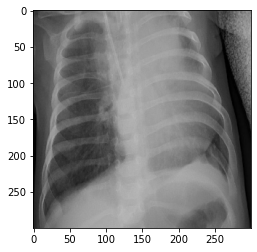

In [0]:
plt.imshow(train_generator[0][0][0])
plt.imshow(train_generator[1][0][0])
plt.show()

In [0]:
from keras.preprocessing import image
path=r"/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/IM-0010-0001.jpeg"
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print(  " has pneumonia ")
else:
    print( " does not have pneumonia")

[0.]
 does not have pneumonia


In [2]:

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    
 
  # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " has pneumonia ")
    else:
        print(fn + " does not have pneumonia")
 

Saving RMLCONSOLIDATIONPA_250.jpg to RMLCONSOLIDATIONPA_250.jpg


NameError: ignored